<a href="https://colab.research.google.com/github/anibaltanganelli/Flora/blob/main/flora_valor_total.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise dos dados dos valores totais se pedidos

In [1]:
#importando bibliotecas para manipular dataframe
import pandas as pd
import numpy as np
import statistics as st


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
#TABELA PEDIDOS ATUALIZADA
pedidos = pd.read_csv("/content/drive/MyDrive/Dados para estudo/pedidos_pgt.csv", index_col = False)
pedidos.head()

,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento
0,123433,1,1,234,2340,2022-01-02,2022-01-03,cartao_parcelado
1,123434,2,2,123,1476,2022-01-02,2022-01-03,cartao
2,123435,3,3,111,1665,2022-01-02,2022-01-03,cartao
3,123436,4,4,144,2880,2022-01-02,2022-01-03,pix
4,123437,5,5,132,1056,2022-01-02,2022-01-03,cartao_parcelado


In [4]:
#TABELA PAGAMENTOS
pagamentos = pd.read_csv("/content/drive/MyDrive/Dados para estudo/Flora_pagamentos.csv", index_col=False)
pagamentos = pagamentos.loc[:, ~pagamentos.columns.str.contains('^Unnamed')]
pagamentos.head()

,id_cliente,data_pedido,valor_total,forma_pagamento,status
0,1,2022-01-02,2340,cartao_parcelado,pago
1,2,2022-01-02,1476,cartao,pago
2,3,2022-01-02,1665,cartao,pago
3,4,2022-01-02,2880,pix,pago
4,5,2022-01-02,1056,cartao_parcelado,pago


In [5]:
#FORNECEDORES
fornecedores = pd.read_csv("/content/drive/MyDrive/Dados para estudo/Flora_fornecedores.csv", index_col=False)
fornecedores.head()

,id_fornecedor,nome_fornecedor,contato_fornecedor
0,1233,Fornecedores de Flores Maravilhosas,contato@floresmaravilhosas.com
1,2331,Jardim Encantado,atendimento@jardimencantado.com
2,3312,Bouquet da Felicidade,suporte@bouquetfelicidade.com
3,1444,Flores do Paraíso,info@floresdoparaiso.com
4,5123,Jardim das Rosas,contato@jardimdasrosas.com


In [6]:
#PRODUTOS
produtos = pd.read_csv("/content/drive/MyDrive/Dados para estudo/Flora_produtos.csv", index_col=False)
produtos = produtos.loc[:, ~produtos.columns.str.contains('^Unnamed')]

produtos.head()

,id_produto,nome_produto,preco_produto,descricao,id_fornecedor,custos
0,1,Rosa Vermelha,10,Rosa vermelha de alta qualidade,1233,4.56
1,2,Rosa Branca,12,Rosa branca elegante,2331,3.12
2,3,Lírio,15,Lírio branco fresco,3312,4.32
3,4,Orquídea,20,Orquídea roxa vibrante,1444,3.24
4,5,Girassol,8,Girassol grande e brilhante,5123,4.56


In [7]:
#CLIENTES

clientes = pd.read_csv('/content/drive/MyDrive/Estudos_Dados_flora/Flora_clientes.csv', index_col=False)
clientes= clientes.loc[:, ~clientes.columns.str.contains('^Unnamed')]
clientes.head()

,id_cliente,nome_cliente,data_nascimento,sexo,endereco,cidade,CPF,email,telefone,empreendimento
0,1,João Silva,1980-01-01,M,Rua das Flores,Sao Paulo,123.456.789-00,joao.silva@email.com,11 12345-6789,marketplace
1,2,Maria Santos,1985-02-02,F,Avenida do Sol,Limeira,234.567.890-11,maria.santos@email.com,11 23456-7890,decoração
2,3,Pedro Oliveira,1990-03-03,M,Travessa da Lua,Campinas,345.678.901-22,pedro.oliveira@email.com,11 34567-8901,buffet
3,4,Ana Pereira,1995-04-04,F,Beco do Vento,Sumaré,456.789.012-33,ana.pereira@email.com,11 45678-9012,cerimonialista
4,5,Lucas Costa,2000-05-05,M,Estrada da Chuva,Santo Andre,567.890.123-44,lucas.costa@email.com,11 56789-0123,igreja


### ESTUDO VALOR_TOTAL DA TABELA PEDIDOS




In [8]:
#Distribuição de dados:
pedidos['valor_total'].describe()

count     274.000000
mean     1679.222628
std      1223.123590
min       186.000000
25%       924.000000
50%      1353.000000
75%      2178.000000
max      8417.000000
Name: valor_total, dtype: float64

In [9]:
# moda
moda = st.mode(pedidos['valor_total'])
print(f'a moda é de R${moda},00')

a moda é de R$888,00


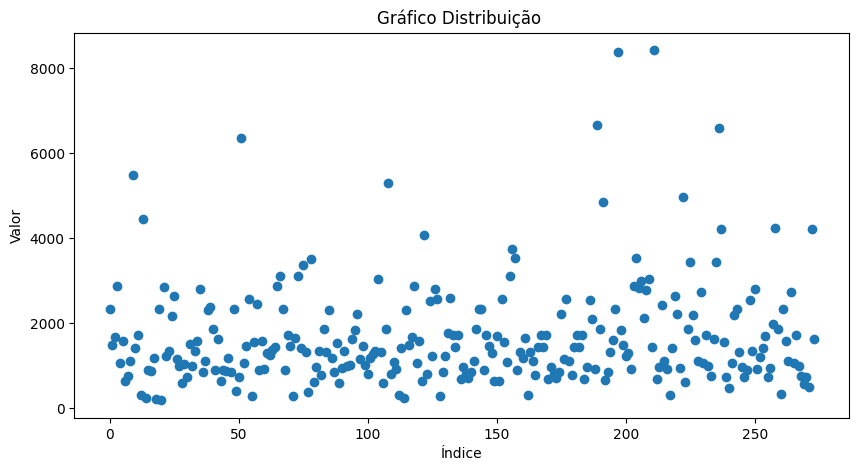

In [10]:
#Gráfico de distribuição dos valores

import matplotlib.pyplot as plt

np.random.seed(0)
valores__ = pedidos['valor_total']


plt.figure(figsize=(10,5))
plt.plot(valores__, 'o')
plt.title('Gráfico Distribuição ')
plt.xlabel('Índice')
plt.ylabel('Valor')

plt.show()


In [11]:
#Quartis

Q1 = pedidos['valor_total'].quantile(0.25)
Q2 = pedidos['valor_total'].quantile(0.50)
Q3 = pedidos['valor_total'].quantile(0.75)

print(f'Primeiro Quartil: {Q1}')
print(f'Segundo Quartil (Mediana): {Q2}')
print(f'Terceiro Quartil: {Q3}')


Primeiro Quartil: 924.0
Segundo Quartil (Mediana): 1353.0
Terceiro Quartil: 2178.0


Análise
- o gasto médio é de 1.679,22 com um desvio padrão de 1223,12 o que pode indicar um descio normal, porém muito próximo ao limite.
- A moda tem o valor de 888,00
- Com o valor de 1.353,00, 50% das compras estão abaixo do valor médio.
- A presença de outliers deve ser avaliada e estudados para avaliar características que permitam ações para influenciar o aumento do gasto dos clientes de mesmo perfil.



QUARTIL INFERIOR

In [12]:
quartil_inferior_VT = pedidos[pedidos['valor_total'] < Q1]
quartil_inferior_VT.head()

,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento
6,123439,7,7,90,630,2022-01-04,2022-01-06,boleto
7,123440,8,8,85,765,2022-01-04,2022-01-06,cartao
12,123445,13,13,31,310,2022-01-04,2022-01-06,cartao
14,123447,15,15,31,248,2022-01-04,2022-01-06,cartao_parcelado
15,123448,16,16,74,888,2022-01-04,2022-01-06,cartao


In [13]:
quartil_inferior_VT['valor_total'].describe()

count     68.000000
mean     655.294118
std      212.680060
min      186.000000
25%      581.750000
50%      724.500000
75%      822.250000
max      900.000000
Name: valor_total, dtype: float64

In [14]:
#DADOS DOS CLIENTES DO PRIMEIRO QUARTIL
mascara_inferior = clientes['id_cliente'].isin(quartil_inferior_VT['id_cliente'])
clientes_quartil_inferior = clientes[mascara_inferior]
clientes_quartil_inferior.head()

,id_cliente,nome_cliente,data_nascimento,sexo,endereco,cidade,CPF,email,telefone,empreendimento
0,1,João Silva,1980-01-01,M,Rua das Flores,Sao Paulo,123.456.789-00,joao.silva@email.com,11 12345-6789,marketplace
1,2,Maria Santos,1985-02-02,F,Avenida do Sol,Limeira,234.567.890-11,maria.santos@email.com,11 23456-7890,decoração
2,3,Pedro Oliveira,1990-03-03,M,Travessa da Lua,Campinas,345.678.901-22,pedro.oliveira@email.com,11 34567-8901,buffet
3,4,Ana Pereira,1995-04-04,F,Beco do Vento,Sumaré,456.789.012-33,ana.pereira@email.com,11 45678-9012,cerimonialista
4,5,Lucas Costa,2000-05-05,M,Estrada da Chuva,Santo Andre,567.890.123-44,lucas.costa@email.com,11 56789-0123,igreja


In [15]:
clientes_quartil_inferior['id_cliente'].value_counts().sum()

35

In [16]:
clientes_quartil_inferior['empreendimento'].value_counts()

buffet               7
cerimonialista       6
marketplace          5
decoração            5
floricultura         4
igreja               3
autônomo             1
supermercado         1
salão de festas      1
outros               1
loja de presentes    1
Name: empreendimento, dtype: int64

DADOS SEGUNDO QUARTIL (MEDIANA)

In [17]:
quartil_mediana_VT = pedidos[(pedidos['valor_total'] > Q1) & (pedidos['valor_total'] < Q2)]
quartil_mediana_VT.head()

,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento
4,123437,5,5,132,1056,2022-01-02,2022-01-03,cartao_parcelado
8,123441,9,9,80,1120,2022-01-04,2022-01-06,boleto
17,123450,18,18,132,1188,2022-01-04,2022-01-06,pix
22,123455,23,1,123,1230,2022-02-01,2022-02-04,cartao_parcelado
23,123456,24,2,111,1332,2022-02-01,2022-02-04,pix


In [18]:
quartil_mediana_VT['valor_total'].describe()

count      62.000000
mean     1137.935484
std       131.421718
min       948.000000
25%      1016.000000
50%      1110.000000
75%      1253.000000
max      1342.000000
Name: valor_total, dtype: float64

In [19]:
#IDENTIFICANDO CLIENTES
mascara_mediana= clientes['id_cliente'].isin(quartil_mediana_VT['id_cliente'])
clientes_mediana = clientes[mascara_mediana]
clientes_mediana.head()

,id_cliente,nome_cliente,data_nascimento,sexo,endereco,cidade,CPF,email,telefone,empreendimento
0,1,João Silva,1980-01-01,M,Rua das Flores,Sao Paulo,123.456.789-00,joao.silva@email.com,11 12345-6789,marketplace
1,2,Maria Santos,1985-02-02,F,Avenida do Sol,Limeira,234.567.890-11,maria.santos@email.com,11 23456-7890,decoração
3,4,Ana Pereira,1995-04-04,F,Beco do Vento,Sumaré,456.789.012-33,ana.pereira@email.com,11 45678-9012,cerimonialista
4,5,Lucas Costa,2000-05-05,M,Estrada da Chuva,Santo Andre,567.890.123-44,lucas.costa@email.com,11 56789-0123,igreja
5,6,Julia Mendes,2005-06-06,F,Alameda do Trovão,Campinas,678.901.234-55,julia.mendes@email.com,11 67890-1234,cerimonialista


In [80]:
len(clientes_mediana['id_cliente'])

32

In [22]:
clientes_mediana['empreendimento'].value_counts()

buffet               8
cerimonialista       5
floricultura         4
marketplace          3
decoração            3
igreja               3
loja de presentes    2
outros               2
autônomo             1
supermercado         1
Name: empreendimento, dtype: int64

In [43]:
clientes_Q1_Q2 = clientes_quartil_inferior.merge(clientes_mediana, on='id_cliente', how='inner')
clientes_Q1_Q2.head()

,id_cliente,nome_cliente_x,data_nascimento_x,sexo_x,endereco_x,cidade_x,CPF_x,email_x,telefone_x,empreendimento_x,nome_cliente_y,data_nascimento_y,sexo_y,endereco_y,cidade_y,CPF_y,email_y,telefone_y,empreendimento_y
0,1,João Silva,1980-01-01,M,Rua das Flores,Sao Paulo,123.456.789-00,joao.silva@email.com,11 12345-6789,marketplace,João Silva,1980-01-01,M,Rua das Flores,Sao Paulo,123.456.789-00,joao.silva@email.com,11 12345-6789,marketplace
1,2,Maria Santos,1985-02-02,F,Avenida do Sol,Limeira,234.567.890-11,maria.santos@email.com,11 23456-7890,decoração,Maria Santos,1985-02-02,F,Avenida do Sol,Limeira,234.567.890-11,maria.santos@email.com,11 23456-7890,decoração
2,4,Ana Pereira,1995-04-04,F,Beco do Vento,Sumaré,456.789.012-33,ana.pereira@email.com,11 45678-9012,cerimonialista,Ana Pereira,1995-04-04,F,Beco do Vento,Sumaré,456.789.012-33,ana.pereira@email.com,11 45678-9012,cerimonialista
3,5,Lucas Costa,2000-05-05,M,Estrada da Chuva,Santo Andre,567.890.123-44,lucas.costa@email.com,11 56789-0123,igreja,Lucas Costa,2000-05-05,M,Estrada da Chuva,Santo Andre,567.890.123-44,lucas.costa@email.com,11 56789-0123,igreja
4,6,Julia Mendes,2005-06-06,F,Alameda do Trovão,Campinas,678.901.234-55,julia.mendes@email.com,11 67890-1234,cerimonialista,Julia Mendes,2005-06-06,F,Alameda do Trovão,Campinas,678.901.234-55,julia.mendes@email.com,11 67890-1234,cerimonialista


In [67]:
len(clientes_Q1_Q2)

24

In [23]:
quartil_superior_VT = pedidos[pedidos['valor_total'] > Q3]
quartil_superior_VT .head()

,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento
0,123433,1,1,234,2340,2022-01-02,2022-01-03,cartao_parcelado
3,123436,4,4,144,2880,2022-01-02,2022-01-03,pix
9,123442,10,10,342,5472,2022-01-04,2022-01-06,cartao_parcelado
13,123446,14,14,234,4446,2022-01-04,2022-01-06,cartao
19,123452,20,20,234,2340,2022-02-01,2022-02-04,boleto


In [24]:
quartil_superior_VT['valor_total'].describe()

count      69.000000
mean     3288.449275
std      1383.367242
min      2184.000000
25%      2376.000000
50%      2808.000000
75%      3510.000000
max      8417.000000
Name: valor_total, dtype: float64

In [25]:
#IDENTIFICANDO
mascara_superior= clientes['id_cliente'].isin(quartil_superior_VT['id_cliente'])
clientes_quartil_superior = clientes[mascara_superior]
clientes_quartil_superior.head()

,id_cliente,nome_cliente,data_nascimento,sexo,endereco,cidade,CPF,email,telefone,empreendimento
0,1,João Silva,1980-01-01,M,Rua das Flores,Sao Paulo,123.456.789-00,joao.silva@email.com,11 12345-6789,marketplace
1,2,Maria Santos,1985-02-02,F,Avenida do Sol,Limeira,234.567.890-11,maria.santos@email.com,11 23456-7890,decoração
2,3,Pedro Oliveira,1990-03-03,M,Travessa da Lua,Campinas,345.678.901-22,pedro.oliveira@email.com,11 34567-8901,buffet
3,4,Ana Pereira,1995-04-04,F,Beco do Vento,Sumaré,456.789.012-33,ana.pereira@email.com,11 45678-9012,cerimonialista
4,5,Lucas Costa,2000-05-05,M,Estrada da Chuva,Santo Andre,567.890.123-44,lucas.costa@email.com,11 56789-0123,igreja


In [81]:
len(clientes_quartil_superior)

33

In [83]:
clientes_quartil_superior['empreendimento'].value_counts()

buffet             6
cerimonialista     5
floricultura       5
decoração          4
marketplace        3
igreja             3
outros             3
supermercado       2
salão de festas    2
Name: empreendimento, dtype: int64

In [70]:
clientes_Q1_Q3 = clientes_quartil_inferior.merge(clientes_quartil_superior, on='id_cliente', how='inner')
clientes_Q1_Q3.head()

,id_cliente,nome_cliente_x,data_nascimento_x,sexo_x,endereco_x,cidade_x,CPF_x,email_x,telefone_x,empreendimento_x,nome_cliente_y,data_nascimento_y,sexo_y,endereco_y,cidade_y,CPF_y,email_y,telefone_y,empreendimento_y
0,1,João Silva,1980-01-01,M,Rua das Flores,Sao Paulo,123.456.789-00,joao.silva@email.com,11 12345-6789,marketplace,João Silva,1980-01-01,M,Rua das Flores,Sao Paulo,123.456.789-00,joao.silva@email.com,11 12345-6789,marketplace
1,2,Maria Santos,1985-02-02,F,Avenida do Sol,Limeira,234.567.890-11,maria.santos@email.com,11 23456-7890,decoração,Maria Santos,1985-02-02,F,Avenida do Sol,Limeira,234.567.890-11,maria.santos@email.com,11 23456-7890,decoração
2,3,Pedro Oliveira,1990-03-03,M,Travessa da Lua,Campinas,345.678.901-22,pedro.oliveira@email.com,11 34567-8901,buffet,Pedro Oliveira,1990-03-03,M,Travessa da Lua,Campinas,345.678.901-22,pedro.oliveira@email.com,11 34567-8901,buffet
3,4,Ana Pereira,1995-04-04,F,Beco do Vento,Sumaré,456.789.012-33,ana.pereira@email.com,11 45678-9012,cerimonialista,Ana Pereira,1995-04-04,F,Beco do Vento,Sumaré,456.789.012-33,ana.pereira@email.com,11 45678-9012,cerimonialista
4,5,Lucas Costa,2000-05-05,M,Estrada da Chuva,Santo Andre,567.890.123-44,lucas.costa@email.com,11 56789-0123,igreja,Lucas Costa,2000-05-05,M,Estrada da Chuva,Santo Andre,567.890.123-44,lucas.costa@email.com,11 56789-0123,igreja


In [69]:
len(clientes_Q1_Q3)

25

In [74]:
clientes_Q2_Q3 = clientes_quartil_superior.merge(clientes_mediana, on='id_cliente', how='inner')
clientes_Q2_Q3.head()

,id_cliente,nome_cliente_x,data_nascimento_x,sexo_x,endereco_x,cidade_x,CPF_x,email_x,telefone_x,empreendimento_x,nome_cliente_y,data_nascimento_y,sexo_y,endereco_y,cidade_y,CPF_y,email_y,telefone_y,empreendimento_y
0,1,João Silva,1980-01-01,M,Rua das Flores,Sao Paulo,123.456.789-00,joao.silva@email.com,11 12345-6789,marketplace,João Silva,1980-01-01,M,Rua das Flores,Sao Paulo,123.456.789-00,joao.silva@email.com,11 12345-6789,marketplace
1,2,Maria Santos,1985-02-02,F,Avenida do Sol,Limeira,234.567.890-11,maria.santos@email.com,11 23456-7890,decoração,Maria Santos,1985-02-02,F,Avenida do Sol,Limeira,234.567.890-11,maria.santos@email.com,11 23456-7890,decoração
2,4,Ana Pereira,1995-04-04,F,Beco do Vento,Sumaré,456.789.012-33,ana.pereira@email.com,11 45678-9012,cerimonialista,Ana Pereira,1995-04-04,F,Beco do Vento,Sumaré,456.789.012-33,ana.pereira@email.com,11 45678-9012,cerimonialista
3,5,Lucas Costa,2000-05-05,M,Estrada da Chuva,Santo Andre,567.890.123-44,lucas.costa@email.com,11 56789-0123,igreja,Lucas Costa,2000-05-05,M,Estrada da Chuva,Santo Andre,567.890.123-44,lucas.costa@email.com,11 56789-0123,igreja
4,6,Julia Mendes,2005-06-06,F,Alameda do Trovão,Campinas,678.901.234-55,julia.mendes@email.com,11 67890-1234,cerimonialista,Julia Mendes,2005-06-06,F,Alameda do Trovão,Campinas,678.901.234-55,julia.mendes@email.com,11 67890-1234,cerimonialista


In [76]:
len(clientes_Q2_Q3)

24

In [ ]:
clientes_Q1_Q2_Q3 = clientes_quartil_superior.merge(clientes_Q1_Q2, on='id_cliente', how='inner')
clientes_Q1_Q2_Q3.head()

In [79]:
len(clientes_Q1_Q2_Q3)

17

In [85]:
#OUTLIERS: Qualquer número abaixo do limite inferior ou acima do limite superior é considerado um outlier.

IQR = Q3 - Q1
IQR

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


print(f'O limite inferior é {limite_inferior}')
print(f'O limite superior é {limite_superior}')

O limite inferior é -957.0
O limite superior é 4059.0


In [91]:
out_superior = pedidos[pedidos['valor_total'] > 4059.0]
out_superior


,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento
9,123442,10,10,342,5472,2022-01-04,2022-01-06,cartao_parcelado
13,123446,14,14,234,4446,2022-01-04,2022-01-06,cartao
51,123484,44,14,334,6346,2022-03-05,2022-03-06,boleto
108,123541,3,16,441,5292,2022-04-01,2022-04-02,cartao
122,123555,17,12,313,4069,2022-05-03,2022-05-08,cartao_parcelado
189,123622,8,4,333,6660,2022-08-01,2022-08-08,cartao_parcelado
191,123624,44,17,441,4851,2022-09-03,2022-09-08,cartao_parcelado
197,123630,14,14,441,8379,2022-09-03,2022-09-08,cartao_parcelado
211,123644,24,14,443,8417,2022-10-01,2022-10-05,cartao_parcelado
222,123655,35,3,331,4965,2022-10-01,2022-10-05,cartao_parcelado


In [89]:
out_superior['valor_total'].describe()

count      14.000000
mean     5582.357143
std      1487.692876
min      4069.000000
25%      4291.500000
50%      5128.500000
75%      6530.500000
max      8417.000000
Name: valor_total, dtype: float64

In [92]:
mascara_out_superior= clientes['id_cliente'].isin(out_superior['id_cliente'])
clientes_out_superior = clientes[mascara_out_superior]
clientes_out_superior.head()

,id_cliente,nome_cliente,data_nascimento,sexo,endereco,cidade,CPF,email,telefone,empreendimento
2,3,Pedro Oliveira,1990-03-03,M,Travessa da Lua,Campinas,345.678.901-22,pedro.oliveira@email.com,11 34567-8901,buffet
7,8,Laura Rocha,2015-08-08,F,Largo do Furacão,Americana,890.123.456-77,laura.rocha@email.com,11 89012-3456,igreja
9,10,Beatriz Teixeira,2021-10-10,F,Rua do Ciclone,Sao Paulo,012.345.678-99,beatriz.teixeira@email.com,11 01234-5678,decoração
12,13,Felipe Pinto,2024-01-13,M,Beco do Furacão,Americana,345.678.901-22,felipe.pinto@email.com,11 34567-8901,supermercado
13,14,Bruna Gomes,2025-02-14,F,Estrada do Ciclone,Campinas,456.789.012-33,bruna.gomes@email.com,11 45678-9012,buffet


In [93]:
len(clientes_out_superior)

12

In [95]:
clientes_out_superior['empreendimento'].value_counts()

buffet             5
igreja             2
decoração          2
supermercado       1
salão de festas    1
floricultura       1
Name: empreendimento, dtype: int64

###CORRELAÇÃO

In [107]:
correlacao_valor_total_produto = pedidos['quantidade'].corr(pedidos['valor_total'])
print(correlacao_valor_total_produto)


0.819319060492124


###AGRUPAMENTO

In [108]:
## Agrupamento
vendas_produto_valor = pedidos_produtos.groupby('nome_produto')['valor_total'].sum() #valor total por produto
vendas_produto_valor

nome_produto
Azaleia           27456
Begônia           34760
Camélia           20358
Crisântemo         6777
Dália              9660
Gerânio           29256
Girassol          17208
Hortênsia         32890
Impatiens         27153
Lírio             17790
Margarida         10633
Miosótis          13712
Narciso           22740
Orquídea          32020
Petúnia           23715
Peônia            50616
Rosa Branca        6552
Rosa Vermelha     10150
Tulipa            14883
Verbena           24830
Violeta            8340
Zínia             18608
Name: valor_total, dtype: int64

### Mínimas e Máximas

In [97]:
##mínimas

id_cli_min_valor = pedidos.groupby('id_cliente')['valor_total'].sum().idxmin() #id do cliente que menos gastou
nome_cli_min_valor = clientes.loc[clientes['id_cliente'] == id_cli_min_valor]['nome_cliente'].values[0] #nome do cliente que menos gastou
qtd_min_cli_valor = pedidos.loc[pedidos['id_cliente'] == id_cli_min_valor]['quantidade'].sum() #quantidade que ele comprou
cli_min_valor = pedidos.loc[pedidos['id_cliente'] == id_cli_min_valor]['valor_total'].sum() #valor gasto pelo cliente que menos comprou

print(
f'O cliente que gastou o menor valor foi {nome_cli_min_valor}, que comprou {qtd_min_cli_valor} unidades no valor total de R${cli_min_valor}.')


O cliente que gastou o menor valor foi   Eduardo Batista , que comprou 31 unidades no valor total de R$186.


In [98]:
##máximas
id_cli_max_valor = pedidos.groupby('id_cliente')['valor_total'].sum().idxmax() #localizando o id do cliente que mais gastou
nome_cli_max_valor = clientes.loc[clientes['id_cliente'] == id_cli_max_valor]['nome_cliente'].values[0] #nome do cliente que mais gastou
qtd_cli_max_valor = pedidos.loc[pedidos['id_cliente'] == id_cli_max_valor]['quantidade'].sum() #somando a quantidade total comprada pelo cliente que compra mais quantidade
cli_max_valor_compra_total = pedidos.loc[pedidos['id_cliente'] == id_cli_max_valor]['valor_total'].sum() #somando valor total do cliente que compra mais unidades


print(
f'O cliente que gastou o maior valor foi{nome_cli_max_valor}, que comprou {qtd_cli_max_valor} unidades no valor total de R${cli_max_valor_compra_total}.\n\n')

O cliente que gastou o maior valor foi  Zacarias Palmeira , que comprou 1961 unidades no valor total de R$22695.




- 74 pedidos estão com valor correspondente ao primeiro quartile foram feitos por 35 clientes distintos;
- 25% dos pedidos tem valor menor ou igual a 581.00 e é 34% inferior ao valor da moda;
- Ainda dentro do Q1 do valor total, 35 clientes são responsáveis pelos 74 pedidos
- Dos pedidos dentro do Q1 20% são buffet, 17,15% são cerimonialistas, 14,3% marketplace, 14,3% floriculturas, 11,40% floriculturas, 8,6% igrejas e o restante, com um pedido cada, autônomo, supermercado, salão de festa e outros.
- 62 pedidos pertencem aos valores da mediana, e foram feitos por 32 clientes distintos;
- Os pedidos do Q2 estão dividdos em buffet com 12,9%, cerimonialistas com 8%, floriculturas com 6,5%, marketplace, decoração e igrejas com 4,83% cada, eo restante corresponde a outros, autônomos e supermercados;
- 24 clientes fizeram pedidos que estão tanto no Q1 quanto no Q2;
- 25 clientes fizeram pedidos tanto no Q1 quanto no Q3
- 69 pedidos pertencem aos valores do terceiro quartil e 33 clientes foram responsáveis pelos pedidos
- Em relação aos empreendimentos dos pedidos do Q3 8,7% buffet, cerimonialistas e floriculturas 7,25% cada, marketplace, outros e igrejas 4,35% cada, supermercado e salão de festas 2,9% cada ;
- 17 clientes fizeram pedidos no Q1, Q2 e Q3
- 14 pedidos estão acima do limite superior que possui o valor de R$4.059,00 e foram feitos por 12 clientes distintos;
- 35,7% dos pedidos foram feitos por Buffet, igrejas e decoração 14,3% cada e salão de festas e floriculturas 7,14% cada
